<a href="https://colab.research.google.com/github/SamdRb/Python-Projects/blob/main/SamDarabi_FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the Data
data = pd.read_csv (r"/content/meteorologicaldataDetroit.csv", error_bad_lines=False, encoding='latin-1',parse_dates=['Date'])

In [ ]:
data.head() 


,Date,Temp max,Temp avg,Temp min,Dew Point max,Dew Point avg,Dew Point min,Humidity (%) max,Humidity (%) avg,Humidity (%) min,...,Wind Speed (mph) min,Pressure (Hg) max,Pressure (Hg) avg,Pressure (Hg) min,Precipitationÿtotal,PM2.5 AQI Value,AQI_Category,Site Name,Site_ID,Source
0,2020-01-01,38,31.5,27,29,22.6,18,92,70.2,56,...,7,29.2,29.1,29.0,0.02,55,Moderate,TRINITY ST MARKS (GHIB),26-163-0099,AQS
1,2020-01-02,47,42.3,37,38,30.8,25,74,64.5,54,...,8,29.0,29.0,28.9,0.00,49,Good,PROPERTY OWNED BY DEARBORN PUBLIC SCHOOLS,26-163-0033,AQS
2,2020-01-03,45,42.6,38,41,36.8,32,93,80.0,71,...,3,29.1,29.1,29.0,0.00,57,Moderate,TRINITY ST MARKS (GHIB),26-163-0099,AQS
3,2020-01-04,38,34.6,30,34,28.4,21,96,78.5,61,...,0,29.3,29.2,29.1,0.00,49,Good,ELIZA-NR,26-163-0093,AQS
4,2020-01-05,39,32.4,30,32,24.8,19,96,74.4,61,...,7,29.5,29.3,29.1,0.00,53,Moderate,Military Park (GHIB),26-163-0100,AQS


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data

,Date,Temp max,Temp avg,Temp min,Dew Point max,Dew Point avg,Dew Point min,Humidity (%) max,Humidity (%) avg,Humidity (%) min,...,Pressure (Hg) min,Precipitationÿtotal,PM2.5 AQI Value,AQI_Category,Site Name,Site_ID,Source,year,month,day
0,2020-01-01,38,31.5,27,29,22.6,18,92,70.2,56,...,29.0,0.02,55,Moderate,TRINITY ST MARKS (GHIB),26-163-0099,AQS,2020,1,1
1,2020-01-02,47,42.3,37,38,30.8,25,74,64.5,54,...,28.9,0.00,49,Good,PROPERTY OWNED BY DEARBORN PUBLIC SCHOOLS,26-163-0033,AQS,2020,1,2
2,2020-01-03,45,42.6,38,41,36.8,32,93,80.0,71,...,29.0,0.00,57,Moderate,TRINITY ST MARKS (GHIB),26-163-0099,AQS,2020,1,3
3,2020-01-04,38,34.6,30,34,28.4,21,96,78.5,61,...,29.1,0.00,49,Good,ELIZA-NR,26-163-0093,AQS,2020,1,4
4,2020-01-05,39,32.4,30,32,24.8,19,96,74.4,61,...,29.1,0.00,53,Moderate,Military Park (GHIB),26-163-0100,AQS,2020,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2020-12-27,42,32.1,25,33,24.8,20,81,74.5,67,...,29.0,0.00,63,Moderate,Military Park (GHIB),26-163-0100,AQS,2020,12,27
355,2020-12-28,45,35.0,26,39,25.2,16,89,67.8,56,...,29.0,0.02,39,Good,Military Park (GHIB),26-163-0100,AQS,2020,12,28
356,2020-12-29,30,27.5,23,25,17.9,13,85,68.0,51,...,29.6,0.00,49,Good,ELIZA-NR,26-163-0093,AQS,2020,12,29
357,2020-12-30,44,35.6,28,40,30.0,22,89,80.5,64,...,29.1,0.01,46,Good,Military Park (GHIB),26-163-0100,AQS,2020,12,30


In [ ]:
# Feature names as a list
col = data.columns 
print(col)

Index(['Date', 'Temp max', 'Temp avg', 'Temp min', 'Dew Point max',
       'Dew Point avg', 'Dew Point min', 'Humidity (%) max',
       'Humidity (%) avg', 'Humidity (%) min', 'Wind Speed (mph) max',
       'Wind Speed (mph) avg', 'Wind Speed (mph) min', 'Pressure (Hg) max',
       'Pressure (Hg) avg', 'Pressure (Hg) min', 'Precipitationÿtotal',
       'PM2.5 AQI Value', 'AQI_Category', 'Site Name', 'Site_ID', 'Source',
       'year', 'month', 'day'],
      dtype='object')


In [ ]:
# y includes our labels and x includes our features
y = data.AQI_Category # Good or Moderate 
list = ['Date','year','Source','Site_ID','Site Name','AQI_Category']
x = data.drop(list,axis = 1 )
x.head()

,Temp max,Temp avg,Temp min,Dew Point max,Dew Point avg,Dew Point min,Humidity (%) max,Humidity (%) avg,Humidity (%) min,Wind Speed (mph) max,Wind Speed (mph) avg,Wind Speed (mph) min,Pressure (Hg) max,Pressure (Hg) avg,Pressure (Hg) min,Precipitationÿtotal,PM2.5 AQI Value,month,day
0,38,31.5,27,29,22.6,18,92,70.2,56,18,11.4,7,29.2,29.1,29.0,0.02,55,1,1
1,47,42.3,37,38,30.8,25,74,64.5,54,20,12.5,8,29.0,29.0,28.9,0.00,49,1,2
2,45,42.6,38,41,36.8,32,93,80.0,71,9,6.4,3,29.1,29.1,29.0,0.00,57,1,3
3,38,34.6,30,34,28.4,21,96,78.5,61,15,7.3,0,29.3,29.2,29.1,0.00,49,1,4
4,39,32.4,30,32,24.8,19,96,74.4,61,16,11.7,7,29.5,29.3,29.1,0.00,53,1,5


Number of Good:  210
Number of Moderate :  149


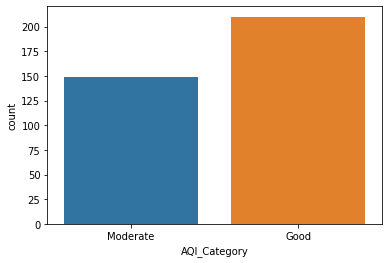

In [ ]:
ax = sns.countplot(y,label="Count") 
G, M = y.value_counts()
print('Number of Good: ',G)
print('Number of Moderate : ',M)


In [ ]:
x.describe()

,Temp max,Temp avg,Temp min,Dew Point max,Dew Point avg,Dew Point min,Humidity (%) max,Humidity (%) avg,Humidity (%) min,Wind Speed (mph) max,Wind Speed (mph) avg,Wind Speed (mph) min,Pressure (Hg) max,Pressure (Hg) avg,Pressure (Hg) min,Precipitationÿtotal,PM2.5 AQI Value,month,day
count,359.00000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,59.67688,52.128134,44.584958,46.033426,40.664903,34.345404,84.041783,67.445404,48.364903,14.963788,8.306128,2.194986,29.454596,29.347911,29.244290,0.092646,46.501393,6.445682,15.866295
std,19.00092,17.503981,16.448936,16.212244,16.544479,17.669781,10.184660,11.963493,15.281822,4.752691,3.007665,2.849263,0.202842,0.199832,0.211841,0.274379,14.690261,3.443353,8.850336
min,20.00000,14.100000,4.000000,6.000000,0.800000,-5.000000,51.000000,37.400000,0.000000,7.000000,2.000000,0.000000,29.000000,28.900000,28.600000,0.000000,20.000000,1.000000,1.000000
25%,43.50000,36.850000,31.000000,33.000000,26.850000,20.000000,76.500000,58.600000,38.000000,12.000000,5.950000,0.000000,29.300000,29.200000,29.100000,0.000000,35.000000,3.000000,8.000000
50%,59.00000,49.000000,42.000000,45.000000,39.600000,32.000000,85.000000,66.100000,48.000000,14.000000,8.100000,0.000000,29.400000,29.300000,29.300000,0.000000,46.000000,6.000000,16.000000
75%,78.00000,68.600000,60.000000,61.000000,55.900000,50.000000,93.000000,76.350000,59.000000,17.500000,10.100000,5.000000,29.600000,29.500000,29.400000,0.040000,56.000000,9.000000,23.500000
max,93.00000,83.700000,77.000000,74.000000,70.700000,67.000000,100.000000,96.600000,89.000000,35.000000,20.300000,12.000000,30.100000,30.000000,29.800000,2.130000,94.000000,12.000000,31.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

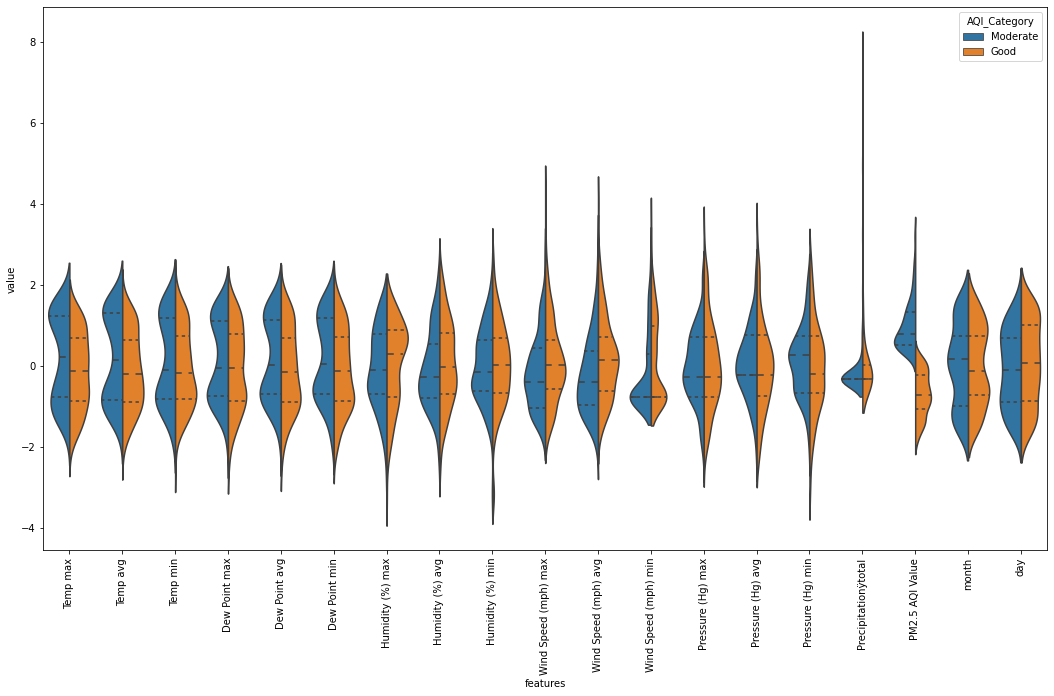

In [ ]:
# Violin plot
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std()) # standardization
data = pd.concat([y,data_n_2.iloc[:,0:31]],axis=1) # first 10 features
data = pd.melt(data,id_vars="AQI_Category",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(18,10))
sns.violinplot(x="features", y="value", hue="AQI_Category", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

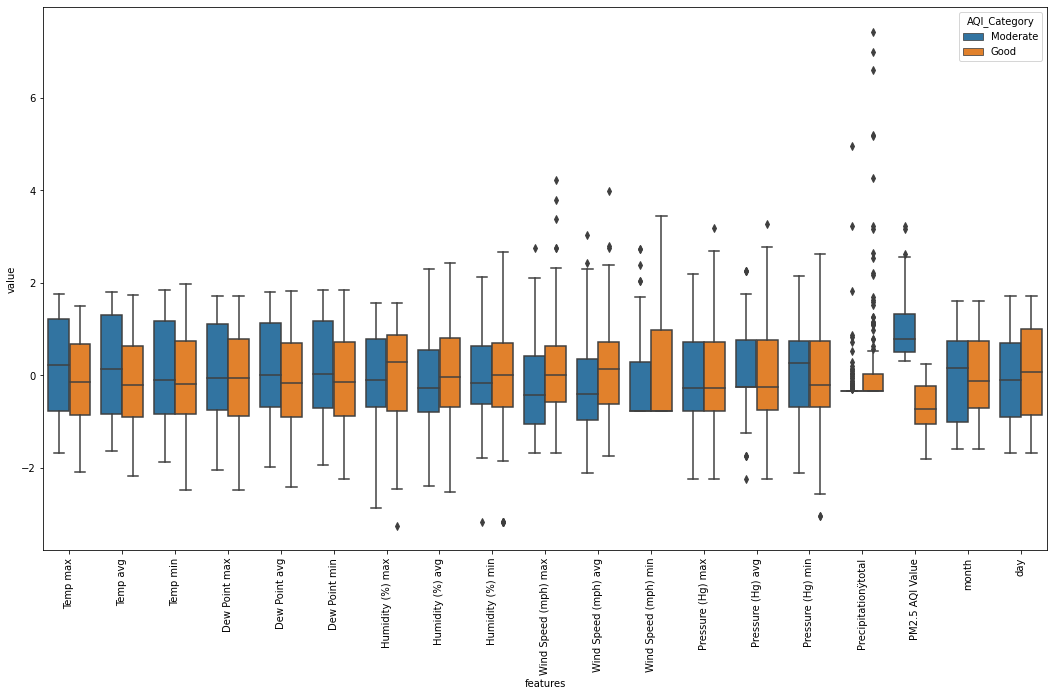

In [ ]:
# As an alternative of violin plot, box plot can be used
plt.figure(figsize=(18,10))
sns.boxplot(x="features", y="value", hue="AQI_Category", data=data)
plt.xticks(rotation=90)

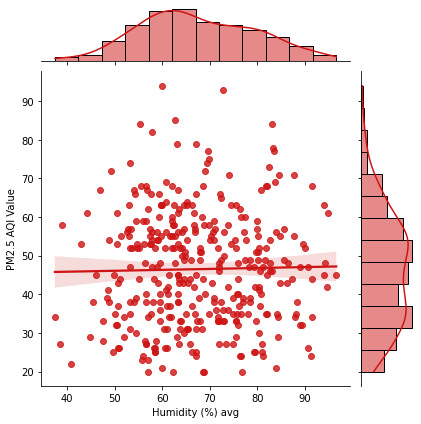

In [ ]:
sns.jointplot(x.loc[:,'Humidity (%) avg'], x.loc[:,'PM2.5 AQI Value'], kind="reg", color="#ce1414")

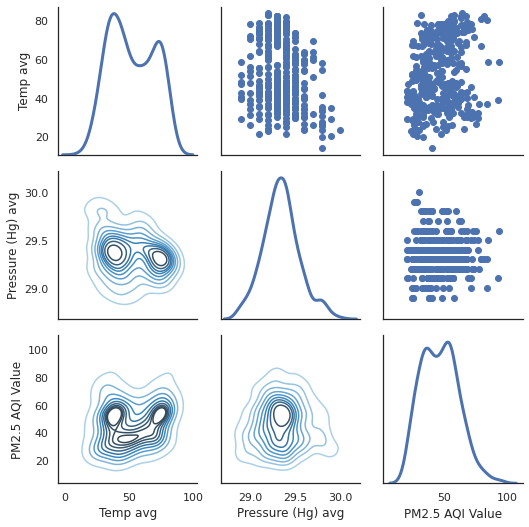

In [ ]:
sns.set(style="white")
df = x.loc[:,['Temp avg','Pressure (Hg) avg','PM2.5 AQI Value']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

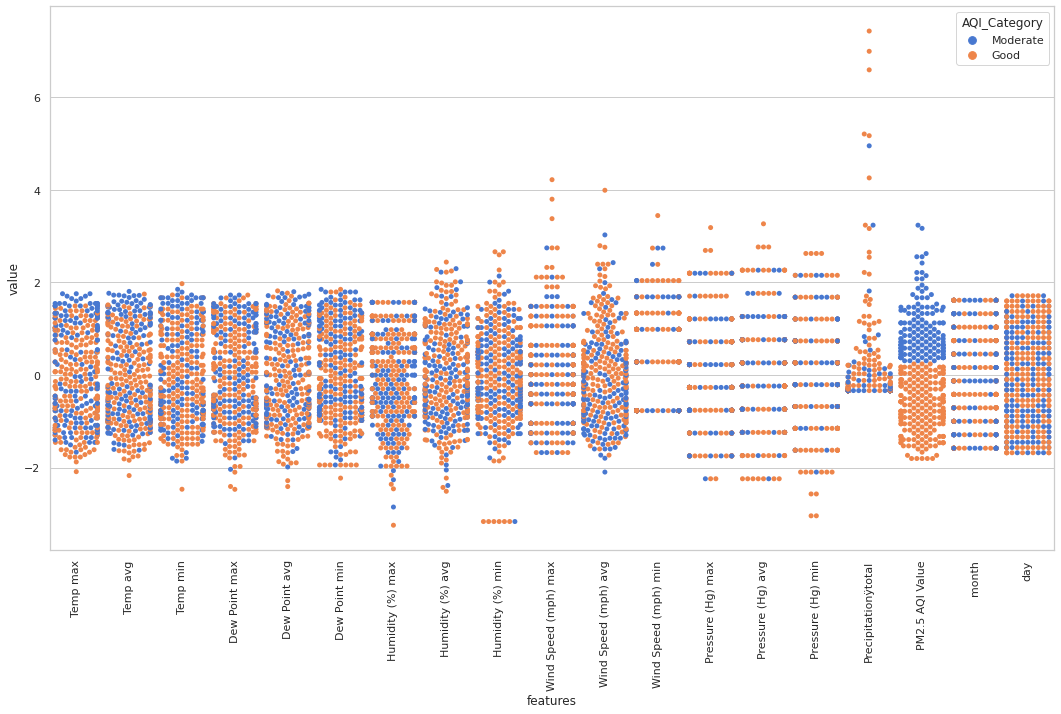

In [ ]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:31]],axis=1)
data = pd.melt(data,id_vars="AQI_Category",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(18,10))
sns.swarmplot(x="features", y="value", hue="AQI_Category", data=data)
plt.xticks(rotation=90)

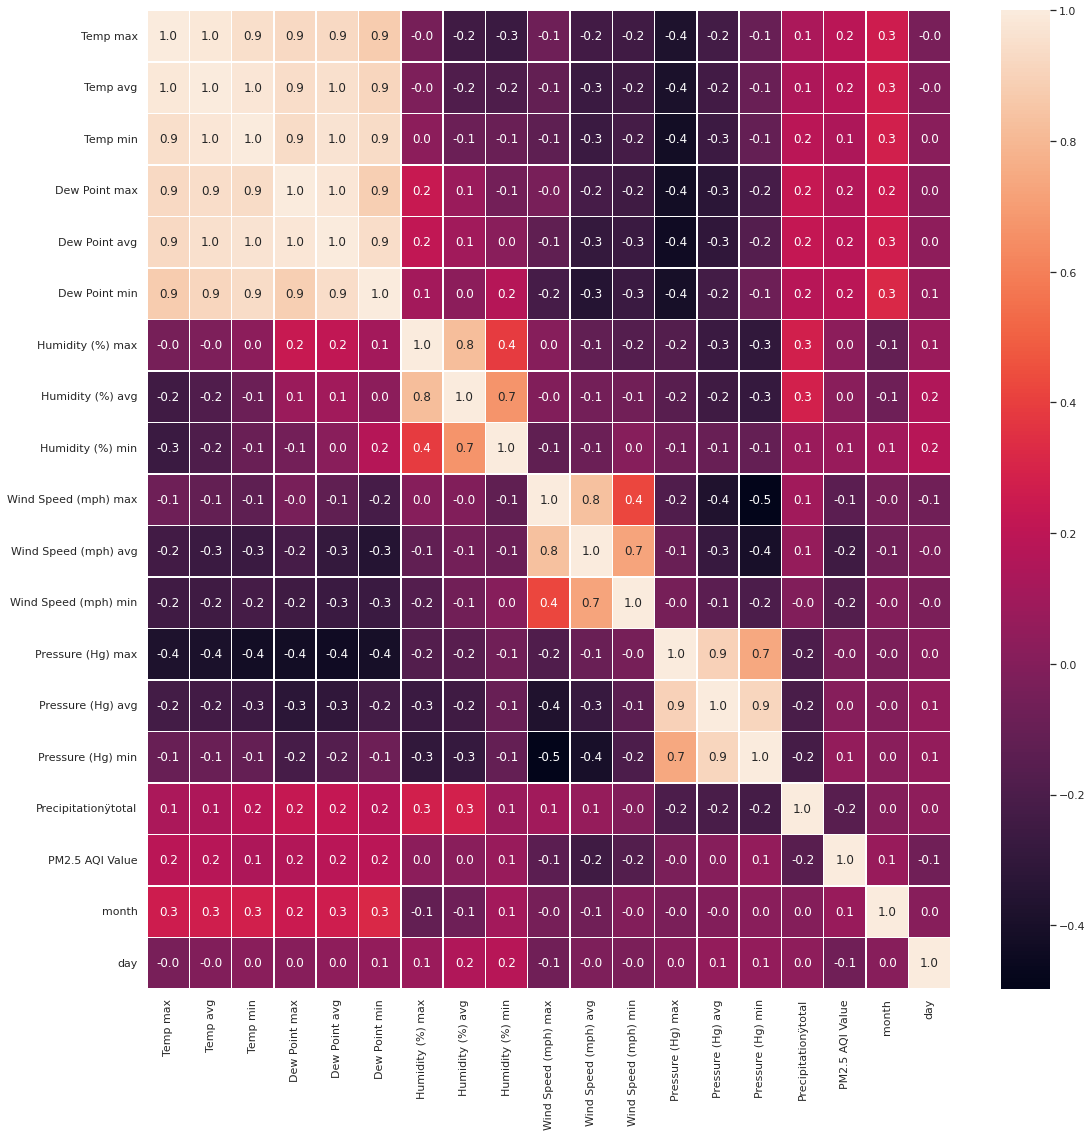

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

     |████████████████████████████████| 86 kB 1.9 MB/s 
     |████████████████████████████████| 1.1 MB 9.2 MB/s 
     |████████████████████████████████| 15.8 MB 2.7 kB/s 
     |████████████████████████████████| 76 kB 6.2 MB/s 
     |████████████████████████████████| 837 kB 55.5 MB/s 
     |████████████████████████████████| 134 kB 55.8 MB/s 
     |████████████████████████████████| 830 kB 54.0 MB/s 
     |████████████████████████████████| 822 kB 55.2 MB/s 
     |████████████████████████████████| 802 kB 66.7 MB/s 
     |████████████████████████████████| 802 kB 58.5 MB/s 
     |████████████████████████████████| 793 kB 56.9 MB/s 
     |████████████████████████████████| 793 kB 57.0 MB/s 
     |████████████████████████████████| 791 kB 63.2 MB/s 
     |████████████████████████████████| 786 kB 53.1 MB/s 
     |████████████████████████████████| 779 kB 73.2 MB/s 
     |████████████████████████████████| 778 kB 43.9 MB/s 
     |████████████████████████████████| 776 kB 68.7 MB/s 
     |█████████████

     |████████████████████████████████| 130 kB 7.0 MB/s 
     |████████████████████████████████| 793 kB 54.0 MB/s 
     |████████████████████████████████| 380 kB 56.4 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.28 which is incompatible.
google-colab 1.0.0 requ

Explained variation per principal component: [0.65497974 0.1557138  0.08027318 0.04716138]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 359 samples in 0.000s...
[t-SNE] Computed neighbors for 359 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 359 / 359
[t-SNE] Mean sigma: 17.150588
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.761372
[t-SNE] KL divergence after 300 iterations: 0.607592


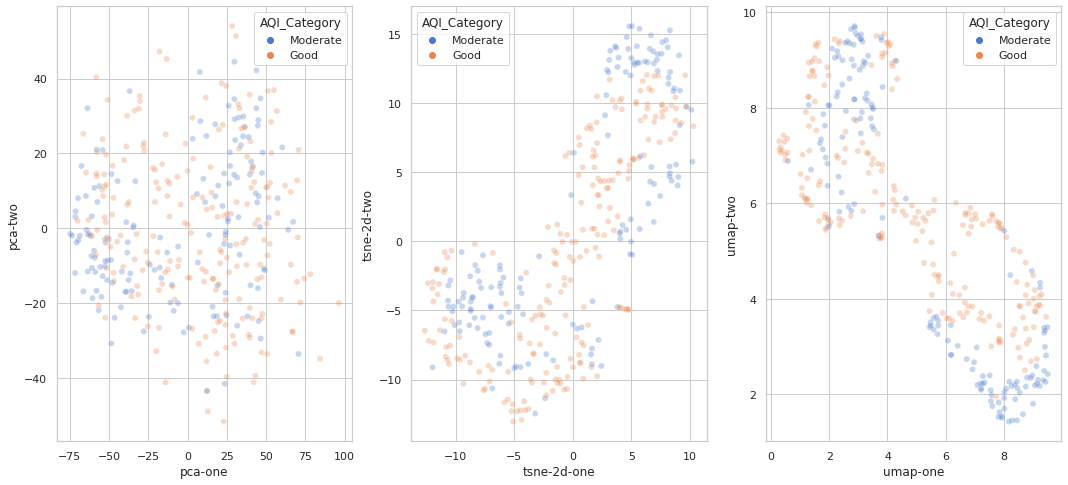

In [ ]:
#Visualizing High-Dimensional Data using PCA, t-SNE & UMAP¶
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(x)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df['pca-one'] = pca_result[:,0]; df['pca-two'] = pca_result[:,1]

# UMAP 
# umap_results = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation').fit_transform(x)
umap_results = umap.UMAP().fit_transform(x)
df['umap-one'] = umap_results[:,0]; df['umap-two'] = umap_results[:,1]

# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)
df['tsne-2d-one'] = tsne_results[:,0]; df['tsne-2d-two'] = tsne_results[:,1]

# Plot Visualizations
plt.figure(figsize=(18,8))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(x="pca-one", y="pca-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax1)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x="umap-one", y="umap-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax3)

In [ ]:
#Feature Selection
#In this part we will select features using different methods and scikit learn package:

#Univariate feature selection: F-Test, Chi-Square Test, Mutual Information
#Recursive feature elimination with cross validation (RFECV): Implements model-based feature selection and optimizes number of selected features

In [ ]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}


# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# The cv is the number of splits for cross-validation.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05, 0.1],
                         'hidden_layer_sizes': [(8, 4), (24, 12), (48, 24),
                                                (96, 48)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.676 (+/-0.254) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'constant', 'solver': 'sgd'}
0.651 (+/-0.092) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'constant', 'solver': 'adam'}
0.710 (+/-0.222) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.610 (+/-0.084) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.684 (+/-0.182) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'constant', 'solver': 'sgd'}
0.837 (+/-0.092) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'constant', 'solver': 'adam'}
0.811 (+/-0.239) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.825 (+/-0.085) for {'activatio

In [ ]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'constant', 'solver': 'adam'}


F-Test Feature Scores List: 
 [1.14334557e-02 9.39240178e-03 5.05870378e-03 4.04894273e-03
 6.57805174e-03 8.48549118e-03 1.77447402e-03 2.81640002e-03
 4.61172938e-06 1.17097104e-02 2.07993222e-02 1.24488028e-02
 2.01806878e-04 7.14368838e-04 3.31619911e-03 1.31733614e-02
 1.00000000e+00 9.57535612e-05 2.47781509e-03]
Feature List: 
 Index(['Temp max', 'Temp avg', 'Temp min', 'Dew Point max', 'Dew Point avg',
       'Dew Point min', 'Humidity (%) max', 'Humidity (%) avg',
       'Humidity (%) min', 'Wind Speed (mph) max', 'Wind Speed (mph) avg',
       'Wind Speed (mph) min', 'Pressure (Hg) max', 'Pressure (Hg) avg',
       'Pressure (Hg) min', 'Precipitationÿtotal', 'PM2.5 AQI Value', 'month',
       'day'],
      dtype='object') 

Mutual Information Feature Scores List: 
 [2.39034444e-02 2.43072488e-01 7.03940916e-02 0.00000000e+00
 4.43388615e-04 0.00000000e+00 0.00000000e+00 7.26286941e-03
 0.00000000e+00 0.00000000e+00 4.95893937e-02 6.70656658e-02
 6.82353067e-02 1.38914431e-02 

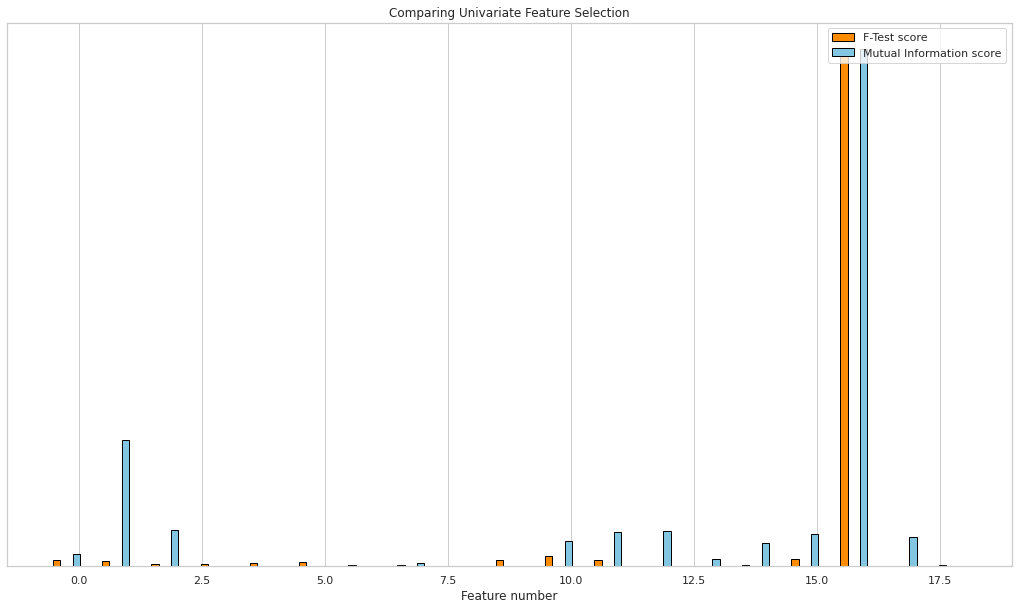

ValueError: ignored

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# ---------------------------------------------------------------------------
# ---------------------------------------------------------------------------

# Get ready to plot scores from Univariate Feature Selection Methods
plt.figure(figsize=(18,10)); plt.clf()
x_indices = np.arange(x.shape[-1])

# SelectKBest Features using F-Test
x_new_f = SelectKBest(f_classif, k=6)
x_new_f.fit_transform(x, y)
#scores = x_new_f.pvalues_
#scores = -np.log10(x_new_f.pvalues_)
scores = x_new_f.scores_
scores /= scores.max()
plt.bar(x_indices - .45, scores, width=.15,
        label='F-Test score', color='darkorange',
        edgecolor='black')

# Print Selected Features
print('F-Test Feature Scores List: \n', x_new_f.scores_)
print('Feature List: \n', x.columns, '\n')


# SelectKBest Features using Mutual Information
x_new_mi = SelectKBest(mutual_info_classif, k=6)
x_new_mi.fit_transform(x, y)
scores = x_new_mi.scores_
scores /= scores.max()
plt.bar(x_indices - .05, scores, width=.15,
        label='Mutual Information score', color='c',
        edgecolor='black')

# Print Selected Features
print('Mutual Information Feature Scores List: \n', x_new_mi.scores_)
print('Feature List: \n', x.columns, '\n')

# Finish Plotting
plt.title("Comparing Univariate Feature Selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

# Re-Run to Get Datasets
x_new_f = SelectKBest(f_classif, k=6).fit_transform(x, y)
x_new_chi2 = SelectKBest(chi2, k=6).fit_transform(x, y)
x_new_mi = SelectKBest(mutual_info_classif, k=6).fit_transform(x, y)

In [ ]:
#Univariate Feature Selection: F-Test
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x_new_f, y, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_,'\n')


y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'constant', 'solver': 'adam'} 

Confusion Matrix:
 [[48  3]
 [ 4 35]] 

Results on the test set:
              precision    recall  f1-score   support

        Good       0.92      0.94      0.93        51
    Moderate       0.92      0.90      0.91        39

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90



In [ ]:
#Recursive Feature Elimination with Cross-Validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Split data into training and testing
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Specify Classifier:
clf = RandomForestClassifier() 

rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(2), scoring='accuracy') #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal Number of Features :', rfecv.n_features_, '\n')
print('Best Features :', x_train.columns[rfecv.support_], '\n')

Optimal Number of Features : 1 

Best Features : Index(['PM2.5 AQI Value'], dtype='object') 



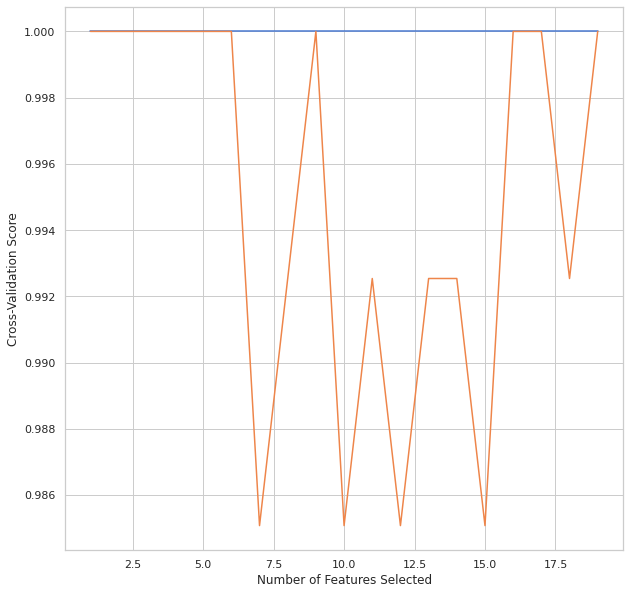

In [ ]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
# Now the rfecv is used to make new predictions.    
y_true, y_pred = y_test , rfecv.predict(x_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Confusion Matrix:
 [[51  0]
 [ 0 39]] 

Results on the test set:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        51
    Moderate       1.00      1.00      1.00        39

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

